In [465]:
import csv

import numpy as np
import tensorflow as tf

%matplotlib inline
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = 42

In [466]:
import os
from datetime import datetime
current_time = datetime.now().strftime('%m%d_%H%M')
folder_name = current_time

In [467]:
folder = 'keypoint_upper/'
save_folder = f'keypoint_upper/training_right_{current_time}/'
os.makedirs(save_folder, exist_ok=True)
os.makedirs(save_folder+'fig/', exist_ok=True)
os.makedirs(save_folder+'pkl/', exist_ok=True)
dataset1 = f'{folder}/keypoint_9apr_upper_right_miew.csv'
dataset2 = f'{folder}/keypoint_9apr_upper_right_mun.csv'
dataset3 = f'{folder}/keypoint_9apr_upper_right_awn.csv'
# dataset4 = f'{folder}/keypoint_9apr_upper_left_awn.csv'
# dataset5 = f'{folder}/keypoint_9apr_upper_left_mun.csv'
# dataset6 = 'hand-gesture-guidedUR3e/hand-gesture-recognition/model/keypoint_from_vdo/groundtruth/bunch_upper.csv'

# Load data

In [468]:
column_names = ['hand_sign_id',
    'lm0_x', 'lm0_y', 'lm1_x', 'lm1_y', 'lm2_x', 'lm2_y', 'lm3_x', 'lm3_y',
    'lm4_x', 'lm4_y', 'lm5_x', 'lm5_y', 'lm6_x', 'lm6_y', 'lm7_x', 'lm7_y',
    'lm8_x', 'lm8_y', 'lm9_x', 'lm9_y', 'lm10_x', 'lm10_y', 'lm11_x', 'lm11_y',
    'lm12_x', 'lm12_y', 'lm13_x', 'lm13_y', 'lm14_x', 'lm14_y', 'lm15_x', 'lm15_y',
    'lm16_x', 'lm16_y', 'lm17_x', 'lm17_y', 'lm18_x', 'lm18_y', 'lm19_x', 'lm19_y',
    'lm20_x', 'lm20_y'
]
df1 = pd.read_csv(dataset1, header=None, names=column_names)
df2 = pd.read_csv(dataset2, header=None, names=column_names)
df3 = pd.read_csv(dataset3, header=None, names=column_names)
# df4 = pd.read_csv(dataset4, header=None, names=column_names)
# df5 = pd.read_csv(dataset5, header=None, names=column_names)
df = pd.concat([df1, df2, df3], axis=0)

In [469]:
df.head()

,hand_sign_id,lm0_x,lm0_y,lm1_x,lm1_y,lm2_x,lm2_y,lm3_x,lm3_y,lm4_x,...,lm16_x,lm16_y,lm17_x,lm17_y,lm18_x,lm18_y,lm19_x,lm19_y,lm20_x,lm20_y
0,0,0.0,0.0,-0.270115,0.212644,-0.419540,0.494253,-0.517241,0.712644,-0.580460,...,-0.178161,0.712644,0.224138,0.626437,0.109195,0.724138,0.011494,0.718391,-0.057471,0.672414
1,0,0.0,0.0,-0.264368,0.206897,-0.413793,0.488506,-0.511494,0.706897,-0.568966,...,-0.201149,0.706897,0.229885,0.620690,0.103448,0.712644,0.000000,0.706897,-0.074713,0.660920
2,0,0.0,0.0,-0.270115,0.218391,-0.413793,0.494253,-0.511494,0.712644,-0.568966,...,-0.189655,0.678161,0.224138,0.626437,0.103448,0.718391,0.000000,0.706897,-0.068966,0.655172
3,0,0.0,0.0,-0.264368,0.212644,-0.413793,0.494253,-0.500000,0.718391,-0.551724,...,-0.143678,0.701149,0.247126,0.643678,0.132184,0.747126,0.040230,0.735632,-0.022989,0.689655
4,1,0.0,0.0,-0.264045,0.224719,-0.404494,0.516854,-0.500000,0.730337,-0.561798,...,-0.157303,0.747191,0.219101,0.612360,0.207865,0.764045,0.151685,0.814607,0.106742,0.820225


In [470]:
# df = df.rename(columns={'gesture': 'hand_sign_id'})

In [471]:
# new_names = {}
# for i in range(21):  # For landmarks 0-20
#    new_names[f'lm_{i}_x'] = f'lm{i}_x'
#    new_names[f'lm_{i}_y'] = f'lm{i}_y'

# # Rename the columns
# df = df.rename(columns=new_names)

In [472]:
print('Shape of the dataset: ', df.shape)
print('No Command row: ',len(df[df.hand_sign_id == 0]))
print('Pinky row: ', len(df[df.hand_sign_id == 1]))

Shape of the dataset:  (1949, 43)
No Command row:  977
Pinky row:  972


In [473]:
df = df.dropna()

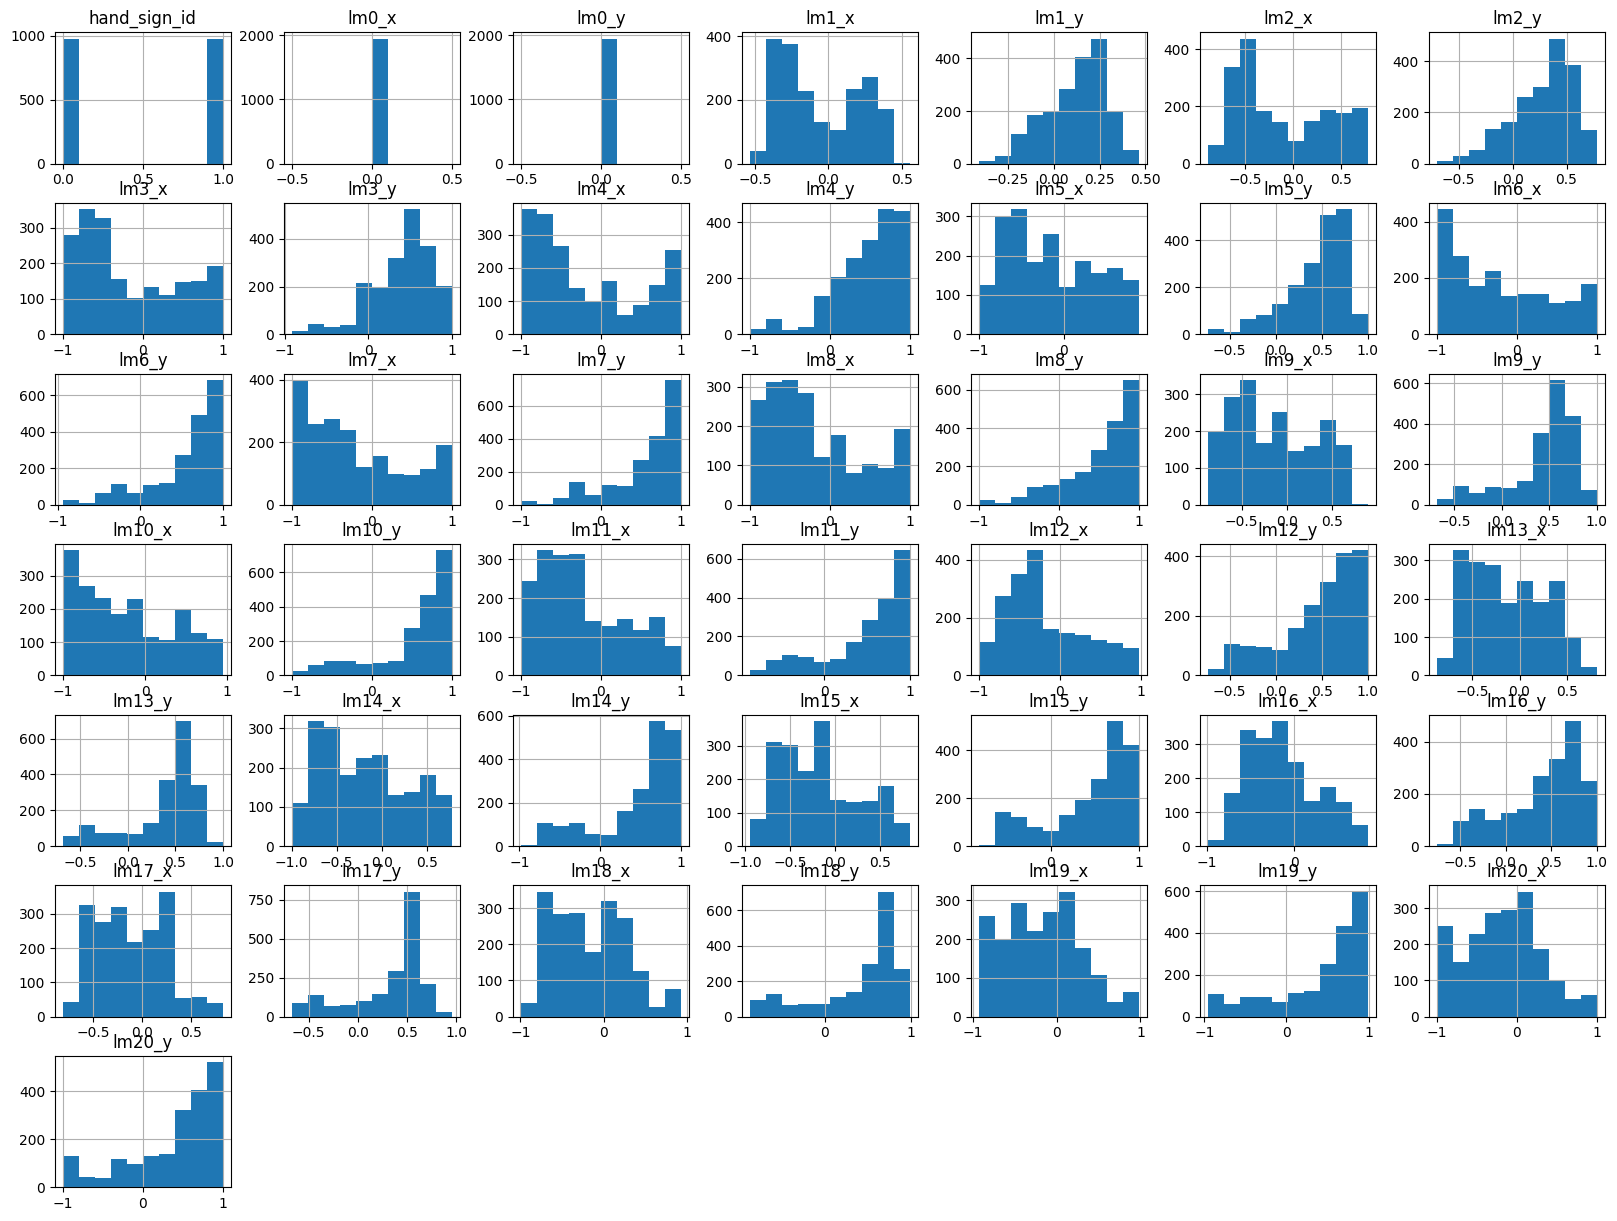

In [474]:
df.hist(figsize=(20, 15))
plt.savefig(f'{save_folder}fig/data_distribution.jpg', format='jpg', dpi=300)
plt.show()

In [475]:
target = np.array(df.hand_sign_id)
x = df.drop(columns=['hand_sign_id'])

# Pre process data

In [476]:
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.3,shuffle=True,stratify=target)

In [477]:
X_train.shape

(1364, 42)

In [478]:
X_test.shape

(585, 42)

### scale feature

In [479]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),columns=x.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=x.columns)

### drop feature

In [480]:
# corr_csv_path = '/content/drive/MyDrive/Final Project/correlation_matrix.csv'
# X_train.corr().round(2).mask((X_train.corr() <= 0.7) & (X_train.corr() >= -0.7), '').to_csv(corr_csv_path)

In [481]:
selected_features = ['lm1_x', 'lm1_y','lm5_x', 'lm5_y','lm8_x', 'lm8_y','lm9_x', 'lm9_y','lm12_x', 'lm12_y','lm13_x', 'lm13_y','lm17_x', 'lm17_y','lm18_x', 'lm18_y','lm19_x', 'lm19_y','lm20_x', 'lm20_y' ]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [482]:
X_train_selected.corr().round(2).mask((X_train.corr()<=0.7)&(X_train.corr()>=-0.7),'')

,lm1_x,lm1_y,lm5_x,lm5_y,lm8_x,lm8_y,lm9_x,lm9_y,lm12_x,lm12_y,lm13_x,lm13_y,lm17_x,lm17_y,lm18_x,lm18_y,lm19_x,lm19_y,lm20_x,lm20_y
lm1_x,1.0,,0.75,,0.76,,,,,,,,,,,,,,,
lm1_y,,1.0,,,,,,,,,,,,,,,,,,
lm5_x,0.75,,1.0,,0.93,,0.96,,0.88,,0.85,,,,,,,,,
lm5_y,,,,1.0,,0.86,,0.94,,0.77,,0.82,,,,,,,,
lm8_x,0.76,,0.93,,1.0,,0.89,,0.97,,0.8,,,,,,,,,
lm8_y,,,,0.86,,1.0,,0.86,,0.94,,0.81,,0.73,,0.76,,0.76,,0.74
lm9_x,,,0.96,,0.89,,1.0,,0.89,,0.96,,0.81,,0.78,,0.72,,,
lm9_y,,,,0.94,,0.86,,1.0,,0.85,,0.96,,0.87,,0.86,,0.84,,0.8
lm12_x,,,0.88,,0.97,,0.89,,1.0,,0.84,,,,0.75,,0.74,,0.7,
lm12_y,,,,0.77,,0.94,,0.85,,1.0,,0.86,,0.82,,0.86,,0.86,,0.84


# Logistic Regression

In [483]:
#Create LR Classifier
#'OVR'=log(p_i/p_not i)
#'Multinomial'=log(p_i/p_r)'
lrc=LogisticRegression(multi_class='ovr',solver='saga',random_state=100)

#Train the model using the training sets
lrc.fit(X_train_selected, y_train)

#Predict the response for test dataset
y_pred_test = lrc.predict(X_test_selected)
y_pred_train = lrc.predict(X_train_selected)

In [484]:
lrc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 100,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Accuracy on train:   0.8196480938416423 

Accuracy on test:  0.7914529914529914 

Classification Report (Testing Data): 
               precision    recall  f1-score   support

       hand0       0.79      0.80      0.79       293
       hand1       0.80      0.78      0.79       292

    accuracy                           0.79       585
   macro avg       0.79      0.79      0.79       585
weighted avg       0.79      0.79      0.79       585
 



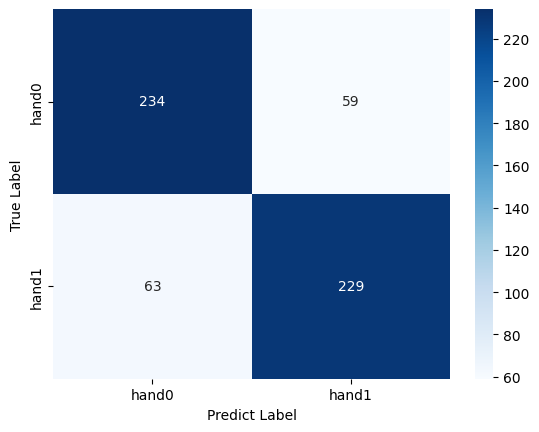

In [485]:
print("Accuracy on train:  ",lrc.score(X_train[selected_features],y_train),'\n')
print("Accuracy on test: ",lrc.score(X_test[selected_features],y_test),'\n')

print("Classification Report (Testing Data): \n", metrics.classification_report(y_test,y_pred_test,target_names=['hand0', 'hand1']),'\n')
cf=metrics.confusion_matrix(y_test,y_pred_test)
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", xticklabels=['hand0', 'hand1'], yticklabels=['hand0', 'hand1'])
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

Classification Report (Traing data): 
               precision    recall  f1-score   support

       hand0       0.83      0.81      0.82       684
       hand1       0.81      0.83      0.82       680

    accuracy                           0.82      1364
   macro avg       0.82      0.82      0.82      1364
weighted avg       0.82      0.82      0.82      1364
 



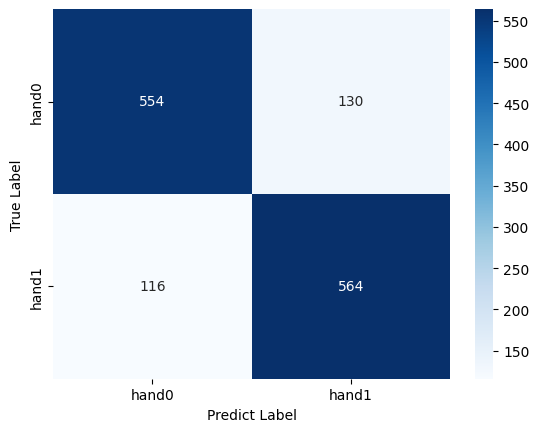

In [486]:
print("Classification Report (Traing data): \n", metrics.classification_report(y_train,y_pred_train,target_names=['hand0', 'hand1']),'\n')
cf=metrics.confusion_matrix(y_train,y_pred_train)
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", xticklabels=['hand0', 'hand1'], yticklabels=['hand0', 'hand1'])
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [487]:
# import joblib
# joblib_save_path = 'keypoint_upper/keypoint_classifier_lrc_upper_right_pipeline.pkl'
# joblib.dump(lrc, joblib_save_path)  # Save model

### Export the whole pipeline

In [488]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Custom transformer to select features based on a mask
class MaskFeatureSelector:
    def __init__(self):
        # Predefined mask for 42 landmarks
        self.mask = [False, False, True, True, False, False, False, False, False, False,
                     True, True, False, False, False, False, True, True, True, True, False, False,
                     False, False, True, True, True, True, False, False, False, False, False, False,
                     True, True, True, True, True, True, True, True]

    def fit(self, X, y=None):
        return self  # No fitting needed

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            # If X is a dataframe
            return X.iloc[:, self.mask]
        else:
            # If X is a numpy array
            return X[:, self.mask]

# Create a pipeline
pipeline = Pipeline([
    ('mask_feature_selection', MaskFeatureSelector()),  # No mask parameter needed
    ('scaler', MinMaxScaler()),  # Normalize features
    ('classifier', LogisticRegression(multi_class='ovr', solver='saga', random_state=10))  # Logistic Regression Model
])


In [489]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('mask_feature_selection',
                 <__main__.MaskFeatureSelector object at 0x1654f7f50>),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 LogisticRegression(multi_class='ovr', random_state=10,
                                    solver='saga'))])

Classification Report: 
               precision    recall  f1-score   support

       hand0       0.79      0.80      0.79       293
       hand1       0.80      0.78      0.79       292

    accuracy                           0.79       585
   macro avg       0.79      0.79      0.79       585
weighted avg       0.79      0.79      0.79       585
 

Accuracy on train:   0.8196480938416423 

Accuracy on test:  0.7914529914529914 



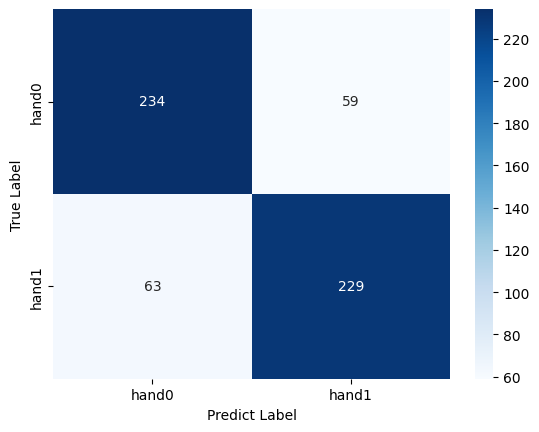

In [490]:
# Get predictions using the pipeline
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Print classification report
print("Classification Report: \n", metrics.classification_report(y_test, y_pred_test, target_names=['hand0', 'hand1']), '\n')

# Print accuracy scores
print("Accuracy on train:  ", pipeline.score(X_train, y_train), '\n')
print("Accuracy on test: ", pipeline.score(X_test, y_test), '\n')

# Compute and visualize confusion matrix
cf = metrics.confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", xticklabels=['hand0', 'hand1'], yticklabels=['hand0', 'hand1'])
plt.ylabel("True Label")
plt.xlabel("Predict Label")

plt.savefig(f'{save_folder}fig/lrc_matrix_tesing_pipeline.jpg', format='jpg', dpi=300)
plt.show()


example real pre processed hand landmark

In [491]:
import joblib
joblib_save_path = f'{save_folder}pkl/lrc_upper_right_pipeline.pkl'
joblib.dump(pipeline, joblib_save_path)  # Save model

['keypoint_upper/training_right_0416_1350/pkl/lrc_upper_right_pipeline.pkl']

### Visualizing eq

Logistic Regression Equation:
log(p/(1-p)) = 0.1786 + (-0.9817 × feature_0) + (1.6588 × feature_1) + (-2.4231 × feature_2) + (0.2876 × feature_3) + (2.1457 × feature_4) + (-0.4867 × feature_5) + (-1.3667 × feature_6) + (0.0282 × feature_7) + (2.3022 × feature_8) + (-1.9305 × feature_9) + (0.5120 × feature_10) + (-0.9528 × feature_11) + (3.3284 × feature_12) + (-3.2344 × feature_13) + (3.2647 × feature_14) + (-2.7844 × feature_15) + (-1.4157 × feature_16) + (0.9786 × feature_17) + (-5.8026 × feature_18) + (6.0636 × feature_19)

Feature Importance:
       Feature  Coefficient  Abs_Coefficient
7    feature_7     0.028197         0.028197
3    feature_3     0.287589         0.287589
5    feature_5    -0.486731         0.486731
10  feature_10     0.511999         0.511999
11  feature_11    -0.952839         0.952839
17  feature_17     0.978588         0.978588
0    feature_0    -0.981694         0.981694
6    feature_6    -1.366734         1.366734
16  feature_16    -1.415654         1.4156

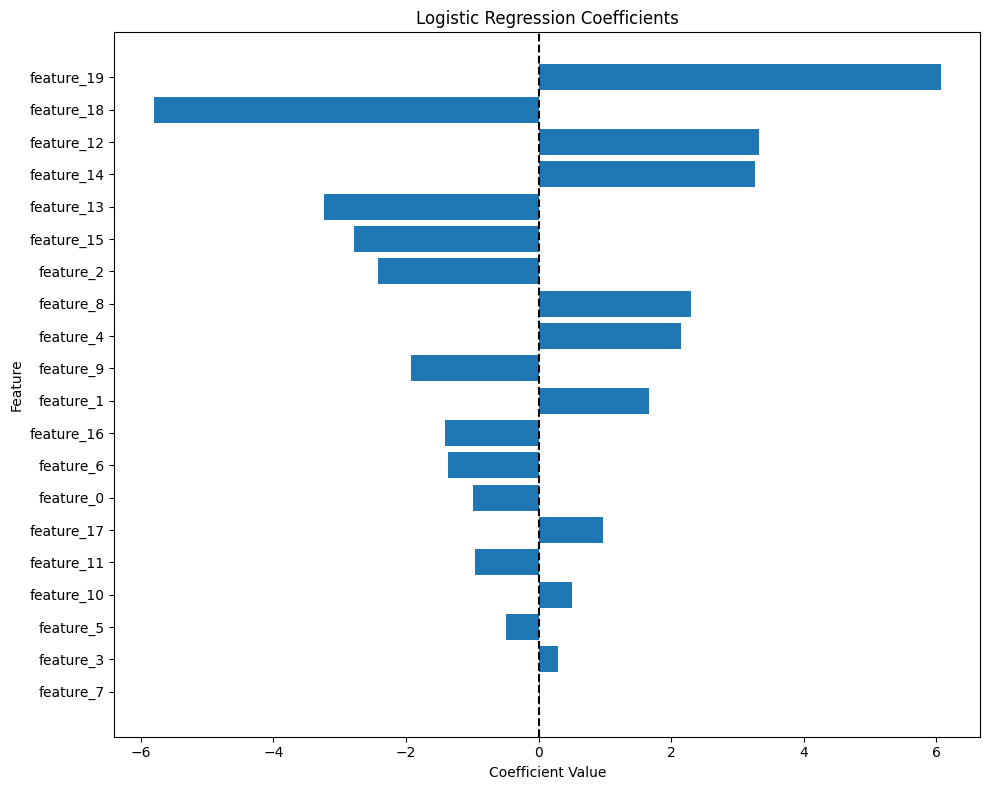

In [492]:
# Extract the logistic regression model from the pipeline
# Assuming it's the last step in the pipeline
logistic_model = pipeline.named_steps['classifier']  # Use your actual step name here

# Get coefficients and intercept
coefficients = logistic_model.coef_[0]  # For binary classification
intercept = logistic_model.intercept_[0]

# Get feature names (if available in the pipeline)
try:
    feature_names = pipeline.named_steps['mask_feature_selection'].get_feature_names_out()
except:
    # If your pipeline doesn't have a column transformer or different structure
    feature_names = [f'feature_{i}' for i in range(len(coefficients))]

# Print the equation
print("Logistic Regression Equation:")
equation = f"log(p/(1-p)) = {intercept:.4f}"
for coef, feature in zip(coefficients, feature_names):
    equation += f" + ({coef:.4f} × {feature})"
print(equation)

# Create a summary DataFrame with feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute importance
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=True)
print("\nFeature Importance:")
print(feature_importance)

# Visualize the coefficients
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'].values, feature_importance['Coefficient'].values)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.axvline(x=0, color='k', linestyle='--')
plt.tight_layout()

plt.savefig(f'{save_folder}fig/lrc_coefficients.jpg', format='jpg', dpi=300)

plt.show()

# KNN

In [493]:
#hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#we'll create a dictionary with possible hyperparameter values
param_val = [{'n_neighbors' : range(3,10),'metric' : ['euclidean', 'minkowski', 'canberra']}]
#grid search configuration
knn = GridSearchCV(KNeighborsClassifier(), param_val, cv = 5,scoring='roc_auc_ovr')
#fitting into our data
knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'minkowski', 'canberra'],
                          'n_neighbors': range(3, 10)}],
             scoring='roc_auc_ovr')

In [494]:
print(knn.best_score_)
print(knn.best_params_)

0.9955796715959891
{'metric': 'euclidean', 'n_neighbors': 5}


In [495]:
y_pred_test = knn.predict(X_test)

In [496]:
pred_prob_new=pd.DataFrame(knn.predict_proba(X_test))
metrics.accuracy_score(y_test,y_pred_test)

0.9726495726495726

Classification Report: 
               precision    recall  f1-score   support

       hand0       0.98      0.97      0.97       293
       hand1       0.97      0.98      0.97       292

    accuracy                           0.97       585
   macro avg       0.97      0.97      0.97       585
weighted avg       0.97      0.97      0.97       585
 

Accuracy on train:   0.9995839783281734 

Accuracy on test:  0.9900474542989386 



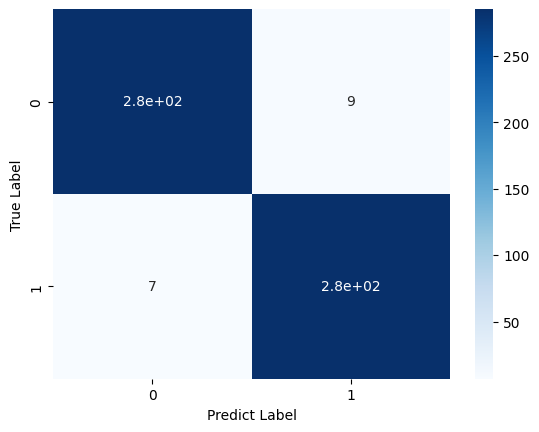

In [497]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Classification Report: \n", metrics.classification_report(y_test,y_pred_test,target_names=['hand0','hand1']),'\n')
print("Accuracy on train:  ",knn.score(X_train,y_train),'\n')
print("Accuracy on test: ",knn.score(X_test,y_test),'\n')
cf=metrics.confusion_matrix(y_test,y_pred_test)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()